In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [8]:
CabDataSets=pd.read_csv('Cab_Data.csv')

In [9]:
CabDataSets

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [10]:
CabDataSets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [11]:
CabDataSets.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [12]:
#Hngi şirket belli bir zaman diliminde max. kullanıcısı var?
a1=CabDataSets.drop_duplicates(subset=["Transaction ID"])
a2=a1.groupby("Company").count()["Transaction ID"]
a1.groupby("Company").count()

,Transaction ID,Date of Travel,City,KM Travelled,Price Charged,Cost of Trip
Company,,,,,,
Pink Cab,84711,84711,84711,84711,84711,84711
Yellow Cab,274681,274681,274681,274681,274681,274681


<AxesSubplot:title={'center':'Toplam İşlemler'}, xlabel='Company', ylabel='count'>

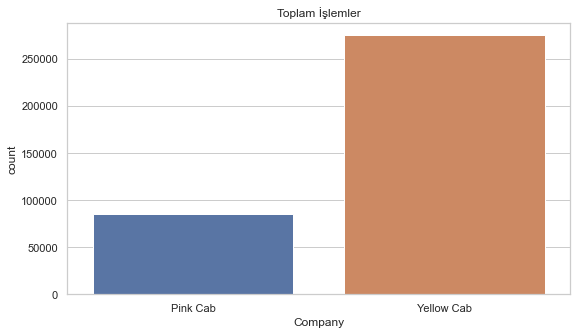

In [65]:
plt.figure(figsize=(9,5))
plt.title("Toplam İşlemler")
sbn.countplot(data=a1,x="Company")

<AxesSubplot:title={'center':'Toplam Müşteri Şehri'}, xlabel='City', ylabel='count'>

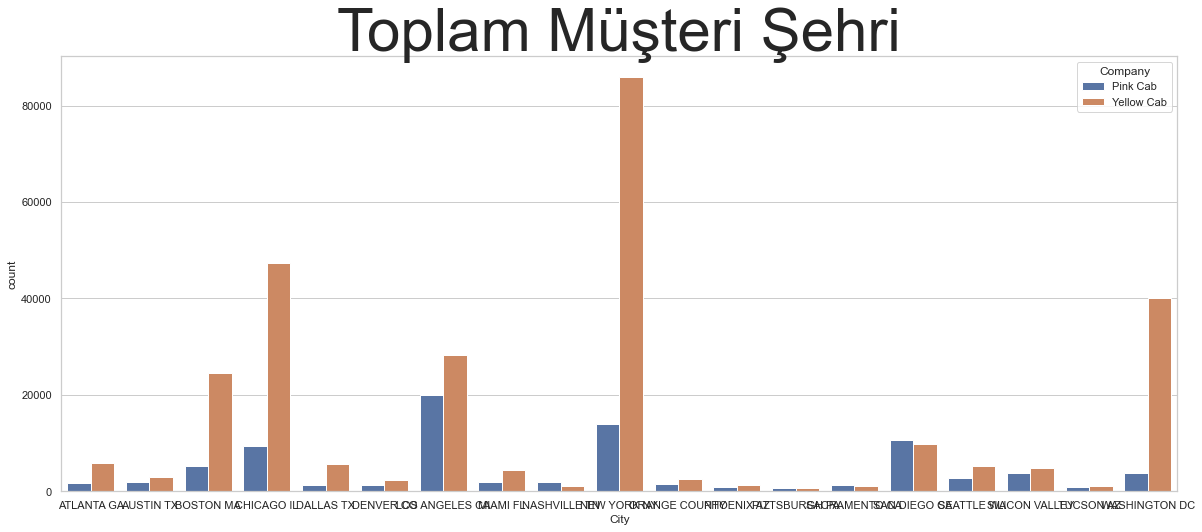

In [98]:
plt.figure(figsize=(20,8))
plt.title("Toplam Müşteri Şehri", fontsize=60)
sbn.countplot(data=a1, x="City", hue="Company")

In [15]:
DTravel=CabDataSets['Date of Travel'].to_list()
ClasicHistory=pd.Timestamp('1899-12-29')
Date=[ClasicHistory + pd.DateOffset(date_offset) for date_offset in DTravel]
CabDataSets['Date of Travel'] = pd.to_datetime(Date, format='%y/%m/%d')

In [16]:
CabDataSets

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-07,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-03,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-04,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-04,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [17]:
CityDataSets=pd.read_csv('City.csv')

In [18]:
CityDataSets

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [19]:
CityDataSets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [20]:
CityDataSets.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [21]:
CityDataSets["Population"]=[degisim.replace(",","") for degisim in CityDataSets.Population]
CityDataSets["Users"]=[degisim.replace(",","") for degisim in CityDataSets.Users]

In [22]:
CityDataSets=CityDataSets.astype({"Population":"int","Users":"int"})

In [23]:
CityDataSets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int32 
 2   Users       20 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 448.0+ bytes


In [24]:
CustumerDataSets=pd.read_csv("Customer_ID.csv")

In [25]:
CustumerDataSets

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [26]:
CustumerDataSets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [27]:
CustumerDataSets.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [28]:
TransactionDataSets=pd.read_csv("Transaction_ID.csv")

In [29]:
TransactionDataSets

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [30]:
TransactionDataSets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [31]:
TransactionDataSets.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [32]:
#şirketlerin yıllık yaklaşık cirosu


In [33]:
CabDataSets["Tip"]=CabDataSets["Price Charged"]-CabDataSets["Cost of Trip"]

In [34]:
CabDataSets

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Tip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440
...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-07,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800
359388,10440104,2018-01-03,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020
359389,10440105,2018-01-04,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200
359390,10440106,2018-01-04,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420


In [35]:
CabPlot=CabDataSets[["Date of Travel","Company","Price Charged"]]

In [36]:
CabPlot=CabPlot.groupby(["Date of Travel"]).sum("Price Charged")

In [37]:
CabPlot=CabPlot.groupby([pd.Grouper(freq='M')]).sum()["Price Charged"]

In [38]:
Cabplot=CabPlot.reset_index()

In [39]:
Cabplot

,Date of Travel,Price Charged
0,2016-01-31,2303744.78
1,2016-02-29,2744742.31
2,2016-03-31,2883035.41
3,2016-04-30,3089676.80
4,2016-05-31,3329398.45
5,2016-06-30,3473596.34
6,2016-07-31,3691470.51
7,2016-08-31,3646549.90
8,2016-09-30,4795413.29
9,2016-10-31,5082300.75


In [40]:
MergeData=CabDataSets.merge(TransactionDataSets, on="Transaction ID").merge(CustumerDataSets, on="Customer ID").merge(CityDataSets, on="City")

In [41]:
MergeData

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Tip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,27703,Card,Male,27,9237,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-02,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,143.6180,51406,Cash,Female,29,6829,418859,127001
359388,10319775,2018-04-12,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,23.0464,51406,Cash,Female,29,6829,418859,127001
359389,10347676,2018-07-05,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,-5.8540,51406,Card,Female,29,6829,418859,127001
359390,10358624,2018-08-01,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,-6.0900,51406,Cash,Female,29,6829,418859,127001


In [42]:
#Yaşa göre ortalama taxi ücreti

<AxesSubplot:title={'center':'Yaşa göre ortalama taxi ücreti'}, xlabel='Age', ylabel='Price Charged'>

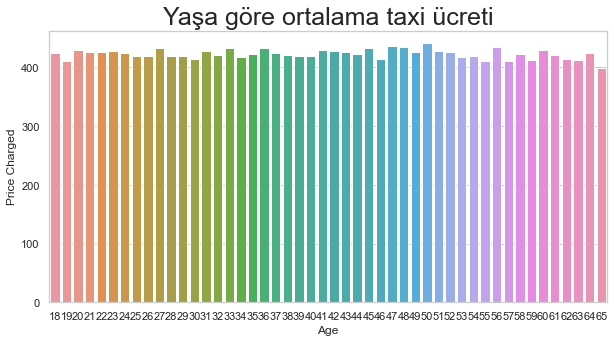

In [62]:
totalAge=MergeData.groupby("Age").mean()["Price Charged"]
totalAgge=totalAge.reset_index()
plt.figure(figsize=(10,5))
plt.title("Yaşa göre ortalama taxi ücreti", fontsize=25)
sbn.barplot(data=totalAgge, x="Age", y="Price Charged")

In [44]:
#Yaşa göre ortalama bahşiş ücreti

<AxesSubplot:title={'center':'Yaşa göre ortalama bahşiş ücreti'}, xlabel='Age', ylabel='Tip'>

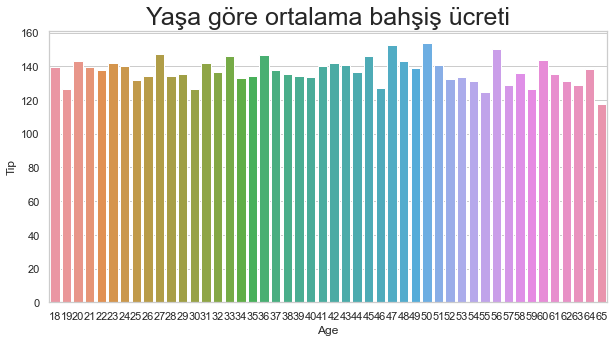

In [99]:
totalTip=MergeData.groupby("Age").mean()["Tip"]
totalTipp=totalTip.reset_index()
plt.figure(figsize=(10,5))
plt.title("Yaşa göre ortalama bahşiş ücreti", fontsize=25)
sbn.barplot(data=totalTipp, x="Age", y="Tip")

In [46]:
#nakit ve kart kullanımları görselleştirme

<AxesSubplot:title={'center':'Nakit ve kart kullanımları görselleştirme'}, xlabel='Payment_Mode', ylabel='Price Charged'>

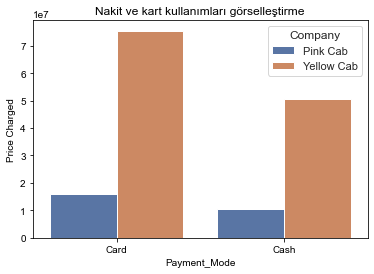

In [47]:
MergeDataa=MergeData.groupby(["Company","Payment_Mode"]).sum()["Price Charged"]
MergeDataa=MergeDataa.reset_index()

plt.title("Nakit ve kart kullanımları görselleştirme")
sbn.set_theme(style="whitegrid")
sbn.barplot(data=MergeDataa, x="Payment_Mode", y="Price Charged", hue="Company")

In [48]:
MergeDataa

,Company,Payment_Mode,Price Charged
0,Pink Cab,Card,15783616.83
1,Pink Cab,Cash,10544634.50
2,Yellow Cab,Card,75459167.70
3,Yellow Cab,Cash,50394719.49


In [49]:
pay=MergeData.groupby(["Company","Payment_Mode"]).count()["Transaction ID"]
pay=pay.reset_index()
pay

,Company,Payment_Mode,Transaction ID
0,Pink Cab,Card,50719
1,Pink Cab,Cash,33992
2,Yellow Cab,Card,164785
3,Yellow Cab,Cash,109896


<AxesSubplot:xlabel='Payment_Mode', ylabel='Transaction ID'>

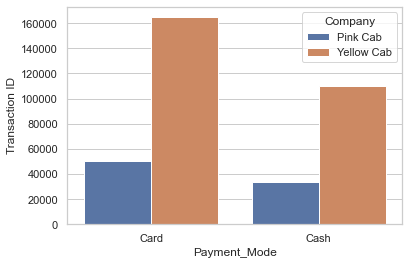

In [50]:
sbn.set_theme(style="whitegrid")
sbn.barplot(data=pay, hue="Company", x="Payment_Mode", y=pay["Transaction ID"])

In [51]:
#Şirkete göre kullanıcı sayısı


Text(0.5, 1.0, 'Şirkete göre kullanıcı sayısı')

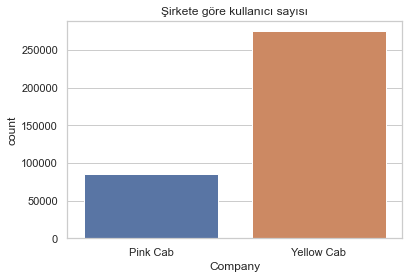

In [52]:
sbn.countplot(data=a1, x="Company")
plt.title("Şirkete göre kullanıcı sayısı")